# TMDB Movies Recommendation System 

Here [The Movies Dataset](https://www.kaggle.com/rounakbanik/the-movies-dataset) by [Rounak Banik](https://www.kaggle.com/rounakbanik) and [TMDB 5000 Movie Dataset](https://www.kaggle.com/tmdb/tmdb-movie-metadata) datasets are used to build `demographic based`, `content based` and `collaborative filtering based` recommendation systems.

> **Understanding theses recommendation systems**
>
> - **`Demographic Filtering`** - They offer `generalized recommendations` to every user, based on movie popularity and/or genre. The System recommends the same movies to users with `similar demographic features`. Since each user is different, this approach is considered to be too simple. The basic idea behind this system is that movies that are more popular and critically acclaimed will have a higher probability of being liked by the average audience.
>
> - **`Content Based Filtering`** - They suggest similar items based on a particular item. This system uses item metadata, such as genre, director, description, actors, etc. for movies, to make these recommendations. The general idea behind these recommender systems is that if a person liked a particular item, he or she will also like an item that is similar to it.
>
> - **`Collaborative Filtering`** - This system matches persons with similar interests and provides recommendations based on this matching. Collaborative filters do not require item metadata like its content-based counterparts.

![](https://media.giphy.com/media/SJkvVMzUIjNngDL4gY/giphy.gif)

In [1]:
from ast import literal_eval

import numpy as np
import pandas as pd

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel

from surprise import SVD, Dataset, Reader
from surprise.model_selection import cross_validate

In [2]:
# Pandas config
def pandas_config():
    # display 10 rows and all the columns
    pd.set_option('display.max_rows', 10)
    pd.set_option('display.max_columns', None)

    
pandas_config()

In [3]:
# Loading the dataset
credits_df = pd.read_csv('../input/tmdb-movie-metadata/tmdb_5000_credits.csv')
movies_df = pd.read_csv('../input/tmdb-movie-metadata/tmdb_5000_movies.csv')

In [4]:
credits_df.head()

,movie_id,title,cast,crew
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [5]:
movies_df.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


The `credits_df` contains the following features:-

* movie_id - A unique identifier for each movie.
* cast - The name of lead and supporting actors.
* crew - The name of Director, Editor, Composer, Writer etc.

The `movies_df` has the following features:- 

* budget - The budget in which the movie was made.
* genre - The genre of the movie, Action, Comedy ,Thriller etc.
* homepage - A link to the homepage of the movie.
* id - This is infact the movie_id as in the first dataset.
* keywords - The keywords or tags related to the movie.
* original_language - The language in which the movie was made.
* original_title - The title of the movie before translation or adaptation.
* overview - A brief description of the movie.
* popularity - A numeric quantity specifying the movie popularity.
* production_companies - The production house of the movie.
* production_countries - The country in which it was produced.
* release_date - The date on which it was released.
* revenue - The worldwide revenue generated by the movie.
* runtime - The running time of the movie in minutes.
* status - "Released" or "Rumored".
* tagline - Movie's tagline.
* title - Title of the movie.
* vote_average -  average ratings the movie recieved.
* vote_count - the count of votes recieved.

In [6]:
# Chaning column name from movie_id to id

print(f'Previous column names {credits_df.columns.tolist()}')
credits_df.columns = ['id', 'title', 'cast', 'crew']
print(f'Current column names {credits_df.columns.tolist()}')

Previous column names ['movie_id', 'title', 'cast', 'crew']
Current column names ['id', 'title', 'cast', 'crew']


In [7]:
# Merging credits_df with movies_df on id
df = movies_df.merge(credits_df, on='id')
df.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title_x,vote_average,vote_count,title_y,cast,crew
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [8]:
# Here we will have `title_x` & `title_y` which will be identical since movies 
# are same, so dropping any one of them & chaning the name of the other to `title`

df.drop(['title_x'], axis='columns', inplace=True)
columns = df.columns.tolist()
columns[columns.index('title_y')] = 'title'
df.columns = columns
df.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,vote_average,vote_count,title,cast,crew
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,7.2,11800,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",6.9,4500,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,6.3,4466,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,7.6,9106,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",6.1,2124,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


## Demographic Filtering

![](https://media.giphy.com/media/fzZzoftMBR8is/giphy.gif)

Before getting started with this 
* We need a `metric` to score or rate movie 
* Calculate the score for every movie 
* Sort the scores and recommend the best rated movie to the users.

We can use the average ratings of the movie as the score but using this won't be fair enough since a movie with 8.9 average rating and only 3 votes cannot be considered better than the movie with 7.8 as as average rating but 40 votes. 

So, I'll be using `IMDB's weighted rating (wr)` which is given as :-
![](https://image.ibb.co/jYWZp9/wr.png)

where,
* v is the number of `votes for the movie`
* m is the `minimum votes` required to be listed in the chart
* R is the `average rating` of the movie
* C is the `mean vote` across the whole report

We already have `v (vote_count)` and `R (vote_average)` and C can be calculated as 

In [9]:
# Mean vote(rating) across the report
C = df.vote_average.mean()
C

6.092171559442011

So, the mean rating for all the movies is approx 6 on a scale of 10.

The next step is to determine an appropriate value for m, the minimum votes required to be listed in the chart. We will use `90th percentile` as our cutoff. In other words, for a movie to feature in the charts, it must have more votes than at least 90% of the movies in the list.

A `quantile` defines a particular part of a data set, i.e. a quantile determines how many values in a distribution are above or below a certain limit. Special quantiles are the `quartile (quarter)`, the `quintile (fifth)` and `percentiles (hundredth)`.

In [10]:
# Minimum votes required to be listed in the chart
m = df.vote_count.quantile(0.9)
m

1838.4000000000015

In [11]:
# Filtering out the movies that qualify for the chart
qualified_movies = df.copy().loc[df.vote_count >= m]

print(qualified_movies.shape)
qualified_movies.sample(5)

(481, 22)


,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,vote_average,vote_count,title,cast,crew
662,63000000,"[{""id"": 18, ""name"": ""Drama""}]",http://www.foxmovies.com/movies/fight-club,550,"[{""id"": 825, ""name"": ""support group""}, {""id"": ...",en,Fight Club,A ticking-time-bomb insomniac and a slippery s...,146.757391,"[{""name"": ""Regency Enterprises"", ""id"": 508}, {...","[{""iso_3166_1"": ""DE"", ""name"": ""Germany""}, {""is...",1999-10-15,100853753,139.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Mischief. Mayhem. Soap.,8.3,9413,Fight Club,"[{""cast_id"": 4, ""character"": ""The Narrator"", ""...","[{""credit_id"": ""55731b8192514111610027d7"", ""de..."
257,110000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 878, ""na...",http://www.steelgetsreal.com/,39254,"[{""id"": 494, ""name"": ""father son relationship""...",en,Real Steel,"In the near-future, Charlie Kenton is a washed...",37.195046,"[{""name"": ""DreamWorks SKG"", ""id"": 27}, {""name""...","[{""iso_3166_1"": ""IN"", ""name"": ""India""}, {""iso_...",2011-09-28,299268508,127.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"If you get one shot, make it real.",6.6,2692,Real Steel,"[{""cast_id"": 13, ""character"": ""Charlie Kenton""...","[{""credit_id"": ""52fe47079251416c91067e59"", ""de..."
3439,6400000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 53, ""nam...",http://www.mgm.com/#/our-titles/1970/The-Termi...,218,"[{""id"": 83, ""name"": ""saving the world""}, {""id""...",en,The Terminator,"In the post-apocalyptic future, reigning tyran...",74.234793,"[{""name"": ""Orion Pictures"", ""id"": 41}, {""name""...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",1984-10-26,78371200,108.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Your future is in his hands.,7.3,4128,The Terminator,"[{""cast_id"": 26, ""character"": ""The Terminator""...","[{""credit_id"": ""52fe4228c3a36847f8008545"", ""de..."
159,139000000,"[{""id"": 14, ""name"": ""Fantasy""}, {""id"": 28, ""na...",http://www.sonypictures.com/movies/spider-man/,557,"[{""id"": 1014, ""name"": ""loss of lover""}, {""id"":...",en,Spider-Man,After being bitten by a genetically altered sp...,82.502566,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2002-05-01,821708551,121.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,With great power comes great responsibility.,6.8,5265,Spider-Man,"[{""cast_id"": 31, ""character"": ""Peter Parker / ...","[{""credit_id"": ""52fe4251c3a36847f8014f01"", ""de..."
262,93000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://www.lordoftherings.net/,120,"[{""id"": 603, ""name"": ""elves""}, {""id"": 604, ""na...",en,The Lord of the Rings: The Fellowship of the Ring,"Young hobbit Frodo Baggins, after inheriting a...",138.049577,"[{""name"": ""WingNut Films"", ""id"": 11}, {""name"":...","[{""iso_3166_1"": ""NZ"", ""name"": ""New Zealand""}, ...",2001-12-18,871368364,178.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,One ring to rule them all,8.0,8705,The Lord of the Rings: The Fellowship of the Ring,"[{""cast_id"": 28, ""character"": ""Frodo Baggins"",...","[{""credit_id"": ""52fe421ac3a36847f80043fb"", ""de..."


We see that there are 481 movies which qualify to be in this list. Now, we need to calculate our metric for each qualified movie. To do this, we will define a function, **`weighted_rating()`** and define a new feature **`score`**, of which we'll calculate the value by applying this function to our DataFrame of qualified movies

In [12]:
def weighted_rating(df_row, m=m, C=C):
    v = df_row.vote_count
    R = df_row.vote_average

    # Calculation based on the IMDB formula
    return (v / (v + m) * R) + (m / (m + v) * C)

In [13]:
# Define a new feature 'score' and calculate its value with `weighted_rating()`
qualified_movies['score'] = qualified_movies.apply(weighted_rating, axis='columns')
qualified_movies.score[:10]

0    7.050669
1    6.665696
2    6.239396
3    7.346721
4    6.096368
5    5.965250
6    6.934805
7    7.041968
8    7.062856
9    5.781535
Name: score, dtype: float64

In [14]:
# Sort movies based on score calculated above
qualified_movies = qualified_movies.sort_values('score', ascending=False)

In [15]:
# Get top 15 movies
qualified_movies[['title', 'vote_count', 'vote_average', 'score']].head(15)

,title,vote_count,vote_average,score
1881,The Shawshank Redemption,8205,8.5,8.059258
662,Fight Club,9413,8.3,7.939256
65,The Dark Knight,12002,8.2,7.920020
3232,Pulp Fiction,8428,8.3,7.904645
96,Inception,13752,8.1,7.863239
...,...,...,...,...
262,The Lord of the Rings: The Fellowship of the Ring,8705,8.0,7.667341
2912,Star Wars,6624,8.1,7.663813
1818,Schindler's List,4329,8.3,7.641883
3865,Whiplash,4254,8.3,7.633781


## Content Based Filtering

In this recommender system the `content` of the movie (overview, cast, crew, keyword, tagline etc) `is used to find its similarity` with other movies. Then the movies that are most likely to be similar are recommended.

![](https://image.ibb.co/f6mDXU/conten.png)

### Plot description based Recommender

We will compute pairwise similarity scores for all movies based on their plot descriptions and recommend movies based on that `similarity score`. The plot description is given in the `overview` feature of our dataset.

In [16]:
df.overview[:5]

0    In the 22nd century, a paraplegic Marine is di...
1    Captain Barbossa, long believed to be dead, ha...
2    A cryptic message from Bond’s past sends him o...
3    Following the death of District Attorney Harve...
4    John Carter is a war-weary, former military ca...
Name: overview, dtype: object

For any of you who has done even a  bit of text processing before knows we need to convert the `word vector of each overview`. Now we'll compute `Term Frequency-Inverse Document Frequency (TF-IDF)` vectors for each overview.

Now if you are wondering what is term frequency, it is the `relative frequency of a word in a document and is given as (term instances / total instances)`. `Inverse Document Frequency` is the relative count of documents containing the term is given as `log(number of documents/documents with term)`. The overall importance of each word to the documents in which they appear is equal to **`TF * IDF`**.

This will give you a matrix where each column represents a word in the overview vocabulary (all the words that appear in at least one document) and each row represents a movie, as before.This is done to reduce the importance of words that occur frequently in plot overviews and therefore, their significance in computing the final `similarity score`.

Fortunately, `scikit-learn` gives you a built-in `TfIdfVectorizer` class that produces the TF-IDF matrix.

In [17]:
# This function can be used to understand TfidfVectorizer & CountVectorizer
def vectorizer_example(vectorizer):
    # Documents
    docs = [
        'I\'m cool but powered by python I\'m awesome', 
        'Bond, James Bond'
    ]
    
    doc_matrix = vectorizer.fit_transform(docs)
    return pd.DataFrame(
        doc_matrix.toarray(), columns=vectorizer.get_feature_names()
    )


vectorizer_example(TfidfVectorizer(stop_words='english'))

,awesome,bond,cool,james,powered,python
0,0.5,0.000000,0.5,0.000000,0.5,0.5
1,0.0,0.894427,0.0,0.447214,0.0,0.0


In [18]:
def get_tfidf(df: pd.DataFrame):
    tfidf = TfidfVectorizer(stop_words='english')
    df.overview = df.overview.fillna('')
    tfidf_matrix = tfidf.fit_transform(df.overview)
    return tfidf_matrix


tfidf_matrix = get_tfidf(df)
tfidf_matrix.shape

(4803, 20978)

We see that over 20,000 different words were used to describe the 4800 movies in our dataset.

With this matrix in hand, we can now compute a similarity score. There are several candidates for this; such as the euclidean, the Pearson and the [cosine similarity scores](https://en.wikipedia.org/wiki/Cosine_similarity). There is no right answer to which score is the best. Different scores work well in different scenarios and it is often a good idea to experiment with different metrics.

We will be using the cosine similarity to calculate a numeric quantity that denotes the similarity between two movies. We use the cosine similarity score since it is independent of magnitude and is relatively easy and fast to calculate. Mathematically, it is defined as follows:
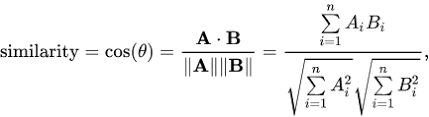

Since we have used the TF-IDF vectorizer, calculating the dot product will directly give us the cosine similarity score. Therefore, we will use sklearn's **`linear_kernel()`** instead of `cosine_similarities()` since it is faster.

In [19]:
def compute_cosine_similarity(matrix):
    cosine_simi = linear_kernel(matrix, matrix)
    return cosine_simi


cosine_sim = compute_cosine_similarity(tfidf_matrix)
print(cosine_sim)

[[1.         0.         0.         ... 0.         0.         0.        ]
 [0.         1.         0.         ... 0.02160533 0.         0.        ]
 [0.         0.         1.         ... 0.01488159 0.         0.        ]
 ...
 [0.         0.02160533 0.01488159 ... 1.         0.01609091 0.00701914]
 [0.         0.         0.         ... 0.01609091 1.         0.01171696]
 [0.         0.         0.         ... 0.00701914 0.01171696 1.        ]]


Diagonal elements are 1 since those are same movies so they have same plot & other values are how much one movie has similar plot to the other.

In [20]:
linear_kernel([[1, 2, 3]], [[1, 2, 3]])

array([[14.]])

In [21]:
# Construct a reverse map of indices and movie titles & drop duplicate indexes
indices = pd.Series(df.index, index=df.title).drop_duplicates()


print(len(cosine_sim))
print(len(indices))

4803
4803


We are now in a good position to define our recommendation function. These are the following steps we'll follow :-
* Get the index of the movie given its title.
* Get the list of cosine similarity scores for that particular movie with all movies. Convert it into a list of tuples where the first element is its position and the second is the similarity score.
* Sort the aforementioned list of tuples based on the similarity scores; that is, the second element.
* Get the top 10 elements of this list. Ignore the first element as it refers to self (the movie most similar to a particular movie is the movie itself).
* Return the titles corresponding to the indices of the top elements.

In [22]:
# Function that takes in movie title as input and outputs most similar movies
def get_recommendations(df, title, cosine_sim=cosine_sim, top=10):
    # Get the index of the movie that matches the title
    idx = indices[title]

    # Get the pairwsie similarity scores of all movies with that movie
    sim_scores = list(enumerate(cosine_sim[idx]))

    # Sort the movies based on the similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Get the scores of the `top` most similar movies
    sim_scores = sim_scores[1:top + 1]

    # Get the movie indices (only if the indexes are well sorted in continuous manner
    # eg. 1, 2, 3, 4 and not like 1, 3, 4 since the index given by enumerate is used
    # to get movie index)
    movie_indices = [i[0] for i in sim_scores]

    # Return the top 10 most similar movies
    return df['title'].iloc[movie_indices]


get_recommendations(df, 'The Dark Knight Rises')

65                              The Dark Knight
299                              Batman Forever
428                              Batman Returns
1359                                     Batman
3854    Batman: The Dark Knight Returns, Part 2
119                               Batman Begins
2507                                  Slow Burn
9            Batman v Superman: Dawn of Justice
1181                                        JFK
210                              Batman & Robin
Name: title, dtype: object

In [23]:
get_recommendations(df, 'The Avengers')

7               Avengers: Age of Ultron
3144                            Plastic
1715                            Timecop
4124                 This Thing of Ours
3311              Thank You for Smoking
3033                      The Corruptor
588     Wall Street: Money Never Sleeps
2136         Team America: World Police
1468                       The Fountain
1286                        Snowpiercer
Name: title, dtype: object

While our system has done a decent job of finding movies with similar plot descriptions, the quality of recommendations is not that great. "The Dark Knight Rises" returns all Batman movies while it is more likely that the people who liked that movie are more inclined to enjoy other Christopher Nolan movies. This is something that cannot be captured by the present system.

### Credits, Genres and Keywords Based Recommender

It goes without saying that the quality of our recommender would be increased with the usage of better metadata. That is exactly what we are going to do in this section. We are going to build a recommender based on the following metadata: the 3 top actors, the director, related genres and the movie plot keywords.

From the cast, crew and keywords features, we need to extract the three most important actors, the director and the keywords associated with that movie. Right now, our data is present in the form of `stringified` lists , we need to convert it into a safe and usable structure

In [24]:
# Parse the stringified features into their corresponding python objects
def eval_features(df, features):
    for feature in features:
        df[feature] = df[feature].apply(literal_eval)


features = ['cast', 'crew', 'keywords', 'genres']
eval_features(df, features)

In [25]:
# Get the director's name from the crew feature. If director is not listed, return NaN
def get_director(crew_dict):
    for crew_info in crew_dict:
        if crew_info['job'] == 'Director':
            return crew_info['name']
    return np.nan


print(df.loc[1, 'crew'])
df['director'] = df['crew'].apply(get_director)

[{'credit_id': '52fe4232c3a36847f800b579', 'department': 'Camera', 'gender': 2, 'id': 120, 'job': 'Director of Photography', 'name': 'Dariusz Wolski'}, {'credit_id': '52fe4232c3a36847f800b4fd', 'department': 'Directing', 'gender': 2, 'id': 1704, 'job': 'Director', 'name': 'Gore Verbinski'}, {'credit_id': '52fe4232c3a36847f800b54f', 'department': 'Production', 'gender': 2, 'id': 770, 'job': 'Producer', 'name': 'Jerry Bruckheimer'}, {'credit_id': '52fe4232c3a36847f800b503', 'department': 'Writing', 'gender': 2, 'id': 1705, 'job': 'Screenplay', 'name': 'Ted Elliott'}, {'credit_id': '52fe4232c3a36847f800b509', 'department': 'Writing', 'gender': 2, 'id': 1706, 'job': 'Screenplay', 'name': 'Terry Rossio'}, {'credit_id': '52fe4232c3a36847f800b57f', 'department': 'Editing', 'gender': 0, 'id': 1721, 'job': 'Editor', 'name': 'Stephen E. Rivkin'}, {'credit_id': '52fe4232c3a36847f800b585', 'department': 'Editing', 'gender': 2, 'id': 1722, 'job': 'Editor', 'name': 'Craig Wood'}, {'credit_id': '52fe

In [26]:
# Returns the list top 3 elements or entire list, whichever is more.
def get_list(x):
    if isinstance(x, list):
        names = [_dict['name'] for _dict in x]
        return names[:3]  # top 3
    # Return empty list in case of missing/malformed data
    return []


# These features are of dict type and have 'name' key in them
features = ['cast', 'keywords', 'genres']
for feature in features:
    df[feature] = df[feature].apply(get_list)

    
# Print the new features of the first 3 films
df[['title', 'cast', 'director', 'keywords', 'genres']].head(3)

,title,cast,director,keywords,genres
0,Avatar,"[Sam Worthington, Zoe Saldana, Sigourney Weaver]",James Cameron,"[culture clash, future, space war]","[Action, Adventure, Fantasy]"
1,Pirates of the Caribbean: At World's End,"[Johnny Depp, Orlando Bloom, Keira Knightley]",Gore Verbinski,"[ocean, drug abuse, exotic island]","[Adventure, Fantasy, Action]"
2,Spectre,"[Daniel Craig, Christoph Waltz, Léa Seydoux]",Sam Mendes,"[spy, based on novel, secret agent]","[Action, Adventure, Crime]"


The next step would be to convert the names and keyword instances into lowercase and strip all the spaces between them. This is done so that our vectorizer doesn't count the Johnny of `Johnny Depp` and `Johnny Galecki` as the same.

In [27]:
# Function to convert all strings to lower case and strip names of spaces
def clean_data(x):
    if isinstance(x, list):
        return [str.lower(i.replace(' ', '')) for i in x]
    else:
        # Check if director exists. If not, return empty string
        if isinstance(x, str):
            return str.lower(x.replace(' ', ''))
        else:
            return ''


# Apply clean_data function to your features.
features = ['cast', 'keywords', 'director', 'genres']
for feature in features:
    df[feature] = df[feature].apply(clean_data)

    
df.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,vote_average,vote_count,title,cast,crew,director
0,237000000,"[action, adventure, fantasy]",http://www.avatarmovie.com/,19995,"[cultureclash, future, spacewar]",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,7.2,11800,Avatar,"[samworthington, zoesaldana, sigourneyweaver]","[{'credit_id': '52fe48009251416c750aca23', 'de...",jamescameron
1,300000000,"[adventure, fantasy, action]",http://disney.go.com/disneypictures/pirates/,285,"[ocean, drugabuse, exoticisland]",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",6.9,4500,Pirates of the Caribbean: At World's End,"[johnnydepp, orlandobloom, keiraknightley]","[{'credit_id': '52fe4232c3a36847f800b579', 'de...",goreverbinski
2,245000000,"[action, adventure, crime]",http://www.sonypictures.com/movies/spectre/,206647,"[spy, basedonnovel, secretagent]",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,6.3,4466,Spectre,"[danielcraig, christophwaltz, léaseydoux]","[{'credit_id': '54805967c3a36829b5002c41', 'de...",sammendes
3,250000000,"[action, crime, drama]",http://www.thedarkknightrises.com/,49026,"[dccomics, crimefighter, terrorist]",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,7.6,9106,The Dark Knight Rises,"[christianbale, michaelcaine, garyoldman]","[{'credit_id': '52fe4781c3a36847f81398c3', 'de...",christophernolan
4,260000000,"[action, adventure, sciencefiction]",http://movies.disney.com/john-carter,49529,"[basedonnovel, mars, medallion]",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",6.1,2124,John Carter,"[taylorkitsch, lynncollins, samanthamorton]","[{'credit_id': '52fe479ac3a36847f813eaa3', 'de...",andrewstanton


We are now in a position to create our `metadata soup`, which is a string that contains all the metadata that we want to feed to our vectorizer (namely actors, director and keywords).

In [28]:
def create_soup(x):
    keywords_str = ' '.join(x.keywords)
    cast_str = ' '.join(x.cast)
    director_str = x.director
    genres_str = ' '.join(x.genres)
    return f'{keywords_str} {cast_str} {director_str} {genres_str}'


df['soup'] = df.apply(create_soup, axis='columns')
df.soup[:5]

0    cultureclash future spacewar samworthington zo...
1    ocean drugabuse exoticisland johnnydepp orland...
2    spy basedonnovel secretagent danielcraig chris...
3    dccomics crimefighter terrorist christianbale ...
4    basedonnovel mars medallion taylorkitsch lynnc...
Name: soup, dtype: object

The next steps are the same as what we did with our plot description based recommender. One important difference is that we use the **`CountVectorizer()`** instead of TF-IDF. This is because we do not want to down-weight the presence of an actor/director if he or she has acted or directed in relatively more movies. It doesn't make much intuitive sense.

In [29]:
vectorizer_example(CountVectorizer(stop_words='english'))

,awesome,bond,cool,james,powered,python
0,1,0,1,0,1,1
1,0,2,0,1,0,0


In [30]:
def get_count_matrix(df: pd.DataFrame):
    count = CountVectorizer(stop_words='english')
    count_matrix = count.fit_transform(df.soup)
    return count_matrix


count_matrix = get_count_matrix(df)
cosine_sim_2 = compute_cosine_similarity(count_matrix)

In [31]:
# Reset index of our main DataFrame and construct reverse mapping as before
df = df.reset_index()
indices = pd.Series(df.index, index=df.title)

In [32]:
get_recommendations(df, 'The Dark Knight Rises', cosine_sim_2)

65                     The Dark Knight
119                      Batman Begins
1196                      The Prestige
3073                 Romeo Is Bleeding
72                       Suicide Squad
82      Dawn of the Planet of the Apes
157             Exodus: Gods and Kings
210                     Batman & Robin
280                     Public Enemies
299                     Batman Forever
Name: title, dtype: object

In [33]:
get_recommendations(df, 'The Godfather', cosine_sim_2)

867     The Godfather: Part III
2731     The Godfather: Part II
1018            The Cotton Club
1170    The Talented Mr. Ripley
1209              The Rainmaker
1394              Donnie Brasco
1525             Apocalypse Now
1850                   Scarface
2280                Sea of Love
2649          The Son of No One
Name: title, dtype: object

We see that our recommender has been successful in capturing more information due to more metadata and has given us (arguably) better recommendations. It is more likely that Marvels or DC comics fans will like the movies of the same production house. Therefore, to our features above we can add `production_company` . We can also increase the weight of the director, by adding the feature multiple times in the soup.

## Collaborative Filtering

![](https://media.giphy.com/media/QWPIBMUCSXRL2/giphy.gif)

Our content based engine suffers from some severe limitations. It is only capable of suggesting movies which are close to a certain movie. That is, it is not capable of capturing tastes and providing recommendations across genres.

Also, the engine that we built is not really personal in that it doesn't capture the personal tastes and biases of a user. Anyone querying our engine for recommendations based on a movie will receive the same recommendations for that movie, regardless of who she/he is.

Therefore, in this section, we will use a technique called Collaborative Filtering to make recommendations to Movie Watchers.
It is basically of two types:-

*  **`User based filtering`**-  These systems recommend products to a user that similar users have liked. For measuring the similarity between two users we can either use pearson correlation or cosine similarity.
This filtering technique can be illustrated with an example. In the following matrixes, each row represents a user, while the columns correspond to different movies except the last one which records the similarity between that user and the target user. Each cell represents the rating that the user gives to that movie. Assume user E is the target.
![](https://cdn-images-1.medium.com/max/1000/1*9NBFo4AUQABKfoUOpE3F8Q.png)

Since user A and F do not share any movie ratings in common with user E, their similarities with user E are not defined in Pearson Correlation. Therefore, we only need to consider user B, C, and D. Based on Pearson Correlation, we can compute the following similarity.
![](https://cdn-images-1.medium.com/max/1000/1*jZIMJzKM1hKTFftHfcSxRw.png)

From the above table we can see that user D is very different from user E as the Pearson Correlation between them is negative. He rated Me Before You higher than his rating average, while user E did the opposite. Now, we can start to fill in the blank for the movies that user E has not rated based on other users.
![](https://cdn-images-1.medium.com/max/1000/1*9TC6BrfxYttJwiATFAIFBg.png)

Although computing user-based CF is very simple, it suffers from several problems. One main issue is that users’ preference can change over time. It indicates that precomputing the matrix based on their neighboring users may lead to bad performance. To tackle this problem, we can apply item-based CF.

* **`Item Based Collaborative Filtering`** - Instead of measuring the similarity between users, the item-based CF recommends items based on their similarity with the items that the target user rated. Likewise, the similarity can be computed with Pearson Correlation or Cosine Similarity. The major difference is that, with item-based collaborative filtering, we fill in the blank vertically, as oppose to the horizontal manner that user-based CF does. The following table shows how to do so for the movie Me Before You.
![](https://cdn-images-1.medium.com/max/1000/1*LqFnWb-cm92HoMYBL840Ew.png)

It successfully avoids the problem posed by dynamic user preference as item-based CF is more static. However, several problems remain for this method. First, the main issue is **`scalability`**. The computation grows with both the customer and the product. The `worst case complexity is O(mn)` with m users and n items. In addition, **`sparsity`** is another concern. Take a look at the above table again. Although there is only one user that rated both Matrix and Titanic rated, the similarity between them is 1. In extreme cases, we can have millions of users and the similarity between two fairly different movies could be very high simply because they have similar rank for the only user who ranked them both.

### Single Value Decomposition

One way to handle the `scalability` and `sparsity` issue created by content filtering recommender is to leverage a **`latent factor model`** to capture the similarity between users and items. Essentially, we want to `turn the recommendation problem into an optimization problem`. We can view it as how good we are in predicting the rating for items given a user. One common metric is Root Mean Square Error (RMSE). **`The lower the RMSE, the better the performance`**.

Now talking about latent factor you might be wondering what is it? It is a broad idea which describes a property or concept that a user or an item have. For instance, for music, latent factor can refer to the genre that the music belongs to. `SVD` decreases the dimension of the utility matrix by extracting its latent factors. Essentially, we map each user and each item into a latent space with dimension r. Therefore, it helps us better understand the relationship between users and items as they become directly comparable. The below figure illustrates this idea.

![](https://cdn-images-1.medium.com/max/800/1*GUw90kG2ltTd2k_iv3Vo0Q.png)

Now enough said , let's see how to implement this.
Since the dataset we used before did not have userId(which is necessary for collaborative filtering) let's load another dataset. We'll be using the [**Surprise** ](https://surprise.readthedocs.io/en/stable/index.html) library to implement SVD.

In [34]:
reader = Reader()
ratings = pd.read_csv('../input/the-movies-dataset/ratings_small.csv')
ratings.sample(5)

,userId,movieId,rating,timestamp
31382,226,37853,3.5,1243762823
62231,452,3565,2.0,1151811848
4203,23,1277,3.5,1148720736
52839,384,2706,4.0,1153155656
51973,380,69278,2.0,1357606461


In [35]:
data = Dataset.load_from_df(ratings[['userId', 'movieId', 'rating']], reader)

In [36]:
svd = SVD()
cross_validate(svd, data, measures=['RMSE', 'MAE'], cv=5)

{'test_rmse': array([0.88848724, 0.90229454, 0.89760162, 0.89686516, 0.90138272]),
 'test_mae': array([0.68596006, 0.69423229, 0.69139764, 0.69147727, 0.69201036]),
 'fit_time': (8.487996101379395,
  8.48885703086853,
  8.59720754623413,
  8.525498151779175,
  8.493309020996094),
 'test_time': (0.22190523147583008,
  0.2048330307006836,
  0.209486722946167,
  0.20540499687194824,
  0.31887269020080566)}

We get a `mean Root Mean Sqaure Error` of 0.89 approx which is more than good enough for our case. Let us now train on our dataset and arrive at predictions.

In [37]:
trainset = data.build_full_trainset()
svd.fit(trainset)

In [38]:
# Let us pick user with user Id 1 and check the ratings she/he has given.
ratings[ratings['userId'] == 1]

,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182
3,1,1129,2.0,1260759185
4,1,1172,4.0,1260759205
...,...,...,...,...
15,1,2193,2.0,1260759198
16,1,2294,2.0,1260759108
17,1,2455,2.5,1260759113
18,1,2968,1.0,1260759200


In [39]:
svd.predict(1, 302, 3)

Prediction(uid=1, iid=302, r_ui=3, est=2.7384401642352074, details={'was_impossible': False})

For movie with ID 302, we get an estimated prediction of **2.669**. One startling feature of this recommender system is that it doesn't care what the movie is (or what it contains). It works purely on the basis of an assigned movie ID and tries to predict ratings based on how the other users have predicted the movie.

---

I'll wrap things up there. If you want to find some other answers then go ahead `edit` this kernel. If you have any `questions` then do let me know.

If this kernel helped you then don't forget to 🔼 `upvote` and share your 🎙 `feedback` on improvements of the kernel.

![](https://media.giphy.com/media/N2fDcOGHsEEA8/giphy.gif)

---